<a href="https://colab.research.google.com/github/SebasMore07/Se-ales-y-Sistemas/blob/main/Parcial_2/Segundo_punto_Parcial_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     / 2.7 MB 9.9 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2928034 sha256=971d57be2db0cdae24a9ff092110ed29e8bb8c568b59c83e4e899c1c0e173a88
  Stored in directory: /tmp/pip-ephem-wheel-cache-btb5z808/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp


Descarga del audio desde YouTube

In [ ]:
import os
import yt_dlp as youtube_dl  # Librería para descargar audio desde YouTube

def download_ytvid_as_mp3(video_url, name):
    """
    Descarga un video de YouTube en formato MP3.

    Parámetros:
        video_url (str): Enlace del video de YouTube.
        name (str): Nombre del archivo de salida (sin extensión).
    """
    video_info = youtube_dl.YoutubeDL().extract_info(url=video_url, download=False)
    filename = f"{name}.mp3"
    options = {
        'format': 'bestaudio/best',  # Descarga solo el mejor audio disponible
        'keepvideo': False,         # No guarda el video
        'outtmpl': filename,        # Define el nombre del archivo
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print(f"Descarga completa: {filename}")

# URL del video de YouTube
video_url = "https://youtu.be/Y0ORhLyJWuc"  # Enlace del video a descargar
name = "señal_mensaje"

# Descargar el archivo MP3
download_ytvid_as_mp3(video_url, name)


[youtube] Extracting URL: https://youtu.be/Y0ORhLyJWuc
[youtube] Y0ORhLyJWuc: Downloading webpage
[youtube] Y0ORhLyJWuc: Downloading tv client config
[youtube] Y0ORhLyJWuc: Downloading player 1080ef44
[youtube] Y0ORhLyJWuc: Downloading tv player API JSON
[youtube] Y0ORhLyJWuc: Downloading ios player API JSON
[youtube] Y0ORhLyJWuc: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=Y0ORhLyJWuc
[youtube] Y0ORhLyJWuc: Downloading webpage
[youtube] Y0ORhLyJWuc: Downloading tv client config
[youtube] Y0ORhLyJWuc: Downloading player 1080ef44
[youtube] Y0ORhLyJWuc: Downloading tv player API JSON
[youtube] Y0ORhLyJWuc: Downloading ios player API JSON
[youtube] Y0ORhLyJWuc: Downloading m3u8 information
[info] Y0ORhLyJWuc: Downloading 1 format(s): 251
[download] Destination: señal_mensaje.mp3
[download] 100% of    3.86MiB in 00:00:00 at 24.97MiB/s  
Descarga completa: señal_mensaje.mp3


Conversión de MP3 a WAV

In [ ]:
import subprocess

# Convertir el archivo MP3 a WAV para facilitar el procesamiento
subprocess.call(['ffmpeg', '-y', '-i', f"{name}.mp3", f"{name}.wav"])
print(f"Conversión a WAV completa: {name}.wav")


Conversión a WAV completa: señal_mensaje.wav


Lectura del archivo de audio

In [ ]:
import soundfile as sf  # Librería para leer archivos de audio

# Leer el archivo de audio
file_name = "señal_mensaje.wav"
audio_data, sample_rate = sf.read(file_name)

# Imprimir detalles del audio
print(f"Frecuencia de muestreo: {sample_rate} Hz")
print(f"Número de muestras: {len(audio_data)}")
print(f"Duración total: {len(audio_data) / sample_rate:.2f} segundos")
print(f"Forma original del audio: {audio_data.shape}")  # Verifica si tiene 2 canales


Frecuencia de muestreo: 48000 Hz
Número de muestras: 11765760
Duración total: 245.12 segundos
Forma original del audio: (11765760, 2)


Conversión a Mono

In [ ]:
import numpy as np

# Si el audio tiene dos canales, convertirlo a mono promediando los canales
if audio_data.ndim == 2:
    audio_data = np.mean(audio_data, axis=1)
    print("Convertido a mono")


Convertido a mono


Segmentación del Audio (20 a 25 segundos)

In [ ]:
start_time = 20  # Tiempo de inicio del segmento en segundos
end_time = 25    # Tiempo final del segmento en segundos

# Calcular índices correspondientes en las muestras
start_sample = int(start_time * sample_rate)
end_sample = int(end_time * sample_rate)

# Extraer el segmento de audio
audio_segment = audio_data[start_sample:end_sample]

# Normalizar el segmento
audio_segment_normalized = audio_segment / np.max(np.abs(audio_segment))


Graficar la Señal Mensaje en el Tiempo

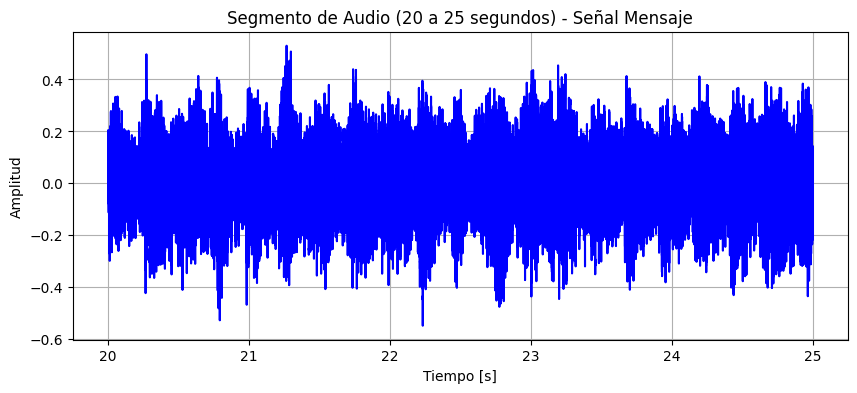

In [ ]:
import matplotlib.pyplot as plt

# Vector de tiempo para el segmento de audio
time_segment = np.linspace(start_time, end_time, len(audio_segment))

# Graficar la señal de audio en el tiempo
plt.figure(figsize=(10, 4))
plt.plot(time_segment, audio_segment, color='blue')
plt.title("Segmento de Audio (20 a 25 segundos) - Señal Mensaje")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


Generación de la Señal Portadora
$
c(t)$

Ingrese el índice de modulación (ej. 0.8): 0.8


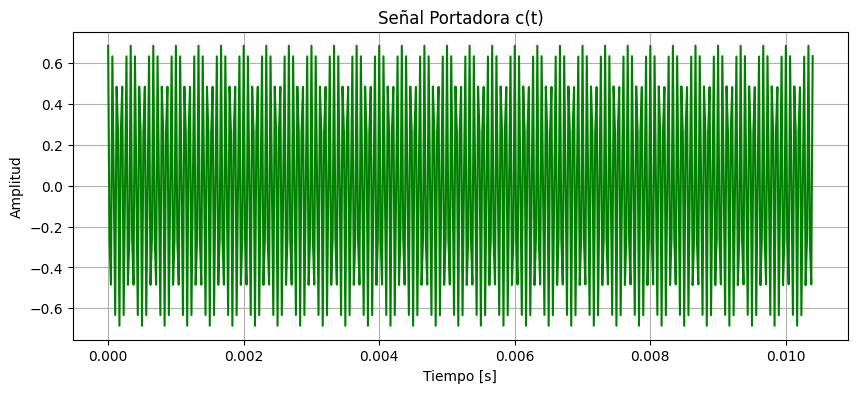

In [ ]:
# Solicitar índice de modulación al usuario
Im = float(input("Ingrese el índice de modulación (ej. 0.8): "))

# Parámetros de la portadora
Fc = 15000  # Frecuencia de la portadora en Hz
Ac = max(abs(audio_segment)) / Im  # Cálculo de la amplitud de la portadora

# Vector de tiempo para la portadora
t = np.linspace(0, len(audio_segment) / sample_rate, len(audio_segment))

# Generar la señal portadora
carrier_signal = Ac * np.cos(2 * np.pi * Fc * t)

# Graficar la señal portadora
plt.figure(figsize=(10, 4))
plt.plot(t[:500], carrier_signal[:500], color='green')  # Graficar primeras 500 muestras
plt.title("Señal Portadora c(t)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


Generación de la señal modulada
$
y(t)=(1+ m(t)/Ac)c(t)$

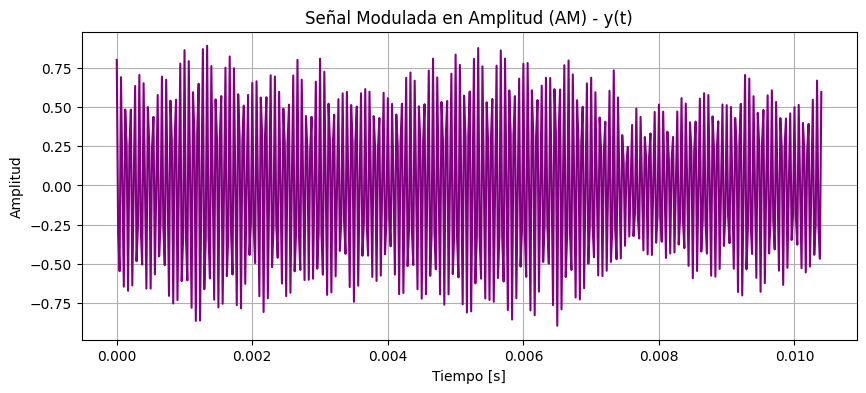

In [ ]:
# Señal modulada AM
modulated_signal = (1 + audio_segment_normalized) * carrier_signal  # Fórmula de modulación AM

# Graficar la señal modulada en el dominio del tiempo
plt.figure(figsize=(10, 4))
plt.plot(t[:500], modulated_signal[:500], color='purple')  # Graficar las primeras 500 muestras
plt.title("Señal Modulada en Amplitud (AM) - y(t)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


Cálculo del espectro en frecuencia de la señal modulada
$y(t)$

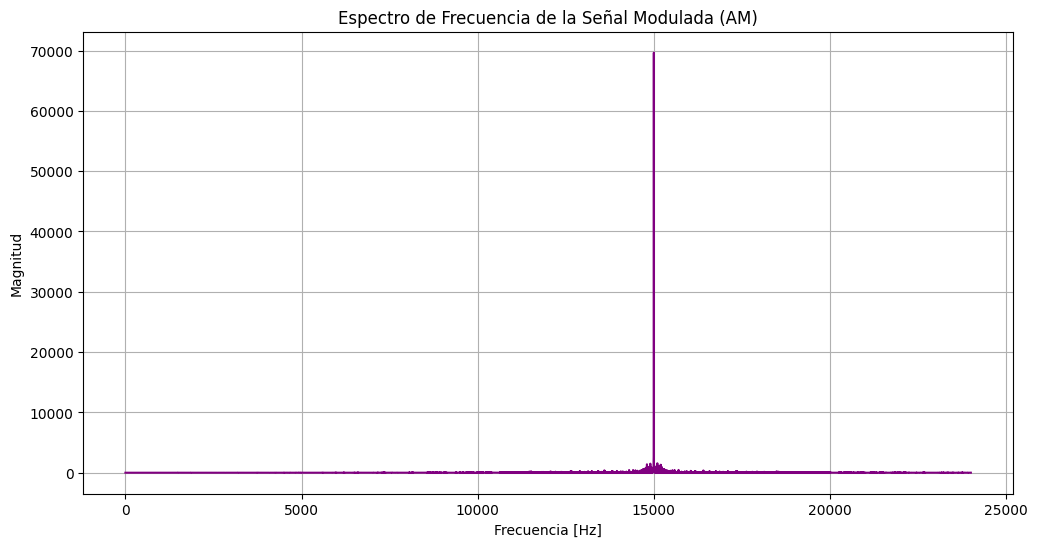

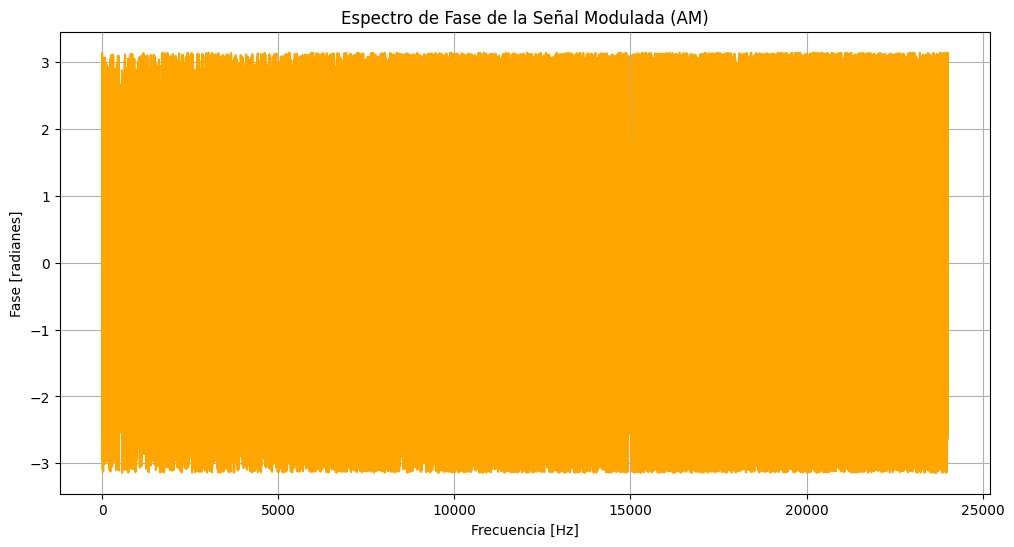

In [ ]:
# Calcular la Transformada Rápida de Fourier (FFT) de la señal modulada
fft_modulated = np.fft.rfft(modulated_signal)  # FFT para señales reales
frequencies = np.fft.rfftfreq(len(modulated_signal), 1 / sample_rate)  # Vector de frecuencias

# Graficar el espectro de magnitud
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(fft_modulated), color='purple')
plt.title("Espectro de Frecuencia de la Señal Modulada (AM)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid()
plt.show()

# Graficar el espectro de fase
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.angle(fft_modulated), color='orange')
plt.title("Espectro de Fase de la Señal Modulada (AM)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Fase [radianes]")
plt.grid()
plt.show()


Reproducción de audios

In [ ]:
from IPython.display import Audio

print("Reproduciendo mensaje m(t)...")
Audio(audio_segment, rate=sample_rate)


Reproduciendo mensaje m(t)...


In [ ]:
print("Reproduciendo portadora c(t)...")
Audio(carrier_signal, rate=sample_rate)

Reproduciendo portadora c(t)...


In [ ]:
# Reproducir la señal modulada
print("Reproduciendo señal modulada (y(t))...")
Audio(modulated_signal, rate=sample_rate)

Reproduciendo señal modulada (y(t))...
